In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./NVDA.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400
...,...,...,...,...,...,...,...
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6.116000e+03
mean,53.052266,54.017201,52.031700,53.064741,52.794253,6.221933e+07
std,121.267334,123.423982,118.835114,121.183234,121.214864,4.316714e+07
min,0.608333,0.656667,0.600000,0.614167,0.563377,4.564400e+06
25%,2.959688,3.027500,2.875000,2.950391,2.707880,3.615840e+07
50%,4.683750,4.747500,4.608750,4.682500,4.389289,5.206235e+07
75%,42.101873,42.645625,41.500000,42.102499,41.741090,7.465490e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,9.230856e+08


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# So there are zero null values in the dataset.

In [8]:
# Lets see if there are any non numeric values in the dataset.
df.select_dtypes(include=['object']).nunique()

Date    6116
dtype: int64

In [9]:
# Alright, so there are no non-numeric values in the dataset.

In [10]:
# Now we will check for any duplicate rows in the dataset.
df.duplicated().sum()

0

In [13]:
# So zero duplicate rows in the dataset.
# Now we can see that the datatype of the 'Date' column is object, we will convert it to datetime format.
df['Date'] = pd.to_datetime(df['Date'])
# Now we will set the 'Date' column as the index of the dataframe.
df.set_index('Date', inplace=True)
# Now we will check the datatype of the 'Date' column again.
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400


In [15]:
# So going through the dataset, we can see that the data is already clean and ready for analysis. So we can proceed with visualization and analysis.

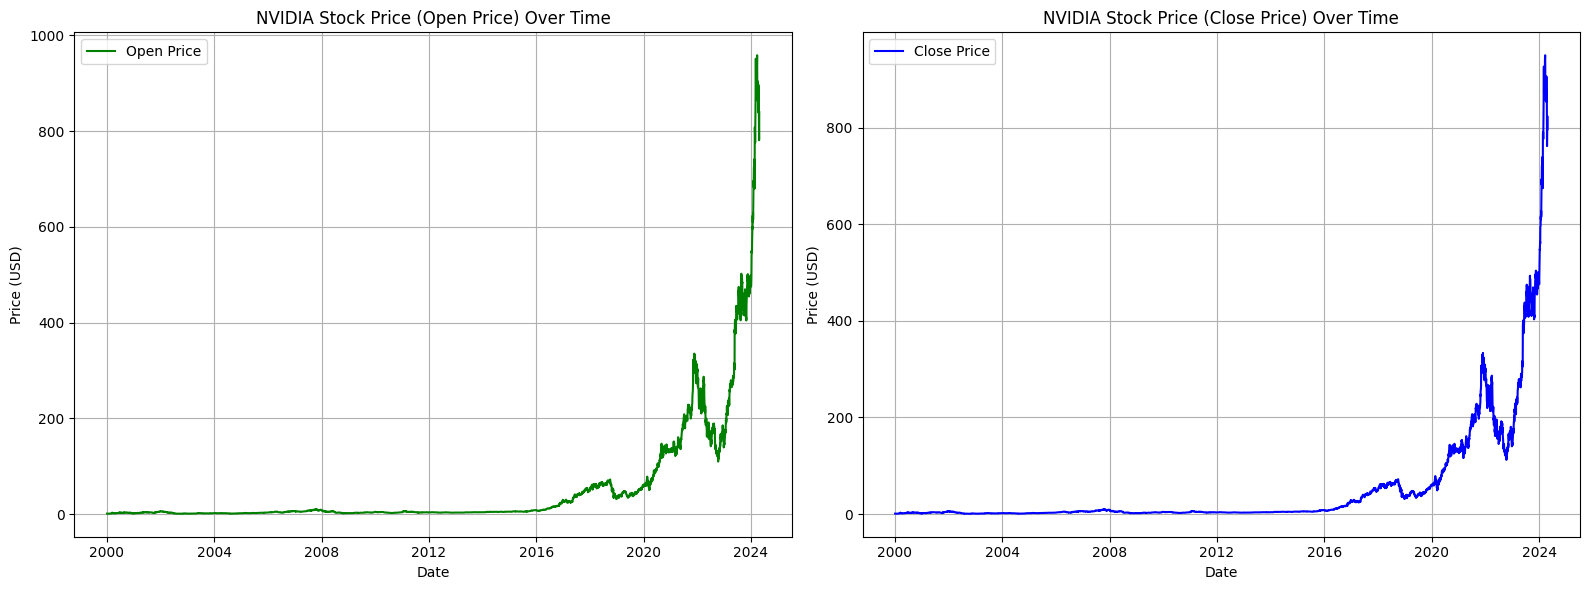

In [29]:
# Now we will visualize the stock prices of NVIDIA over time.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Open Price
axes[0].plot(df.index, df['Open'], color='green')
axes[0].set_title('NVIDIA Stock Price (Open Price) Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].grid()
axes[0].legend(['Open Price'])

# Close Price
axes[1].plot(df.index, df['Close'], color='blue')
axes[1].set_title('NVIDIA Stock Price (Close Price) Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].grid()
axes[1].legend(['Close Price'])

plt.tight_layout()
plt.show()

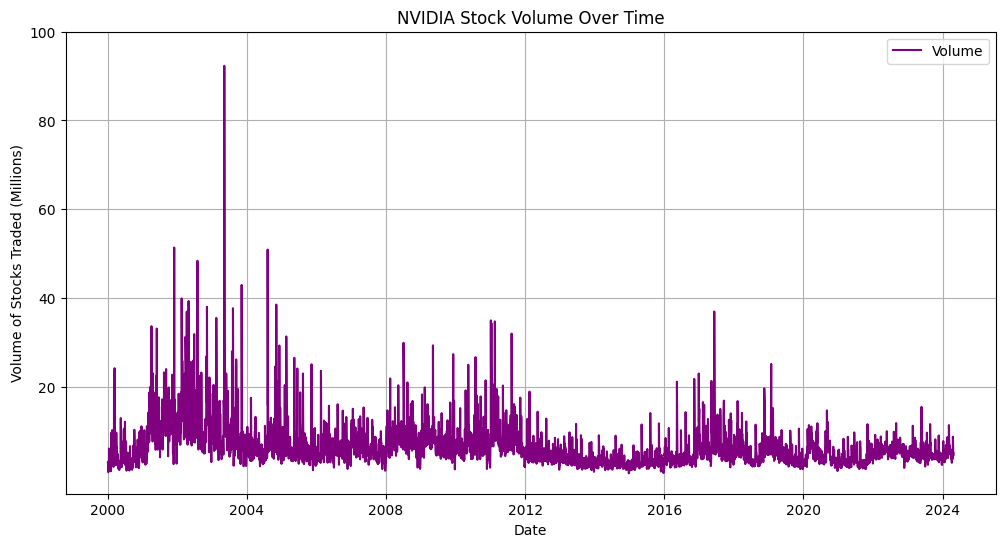

In [43]:
# Now we will visualize the stock volume of NVIDIA over time.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], color='purple')
plt.title('NVIDIA Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of Stocks Traded (Millions)')
plt.yticks([200000000, 400000000, 600000000, 800000000, 1000000000], ['20', '40', '60', '80', '100'])
plt.grid()
plt.legend(['Volume'])
plt.show()

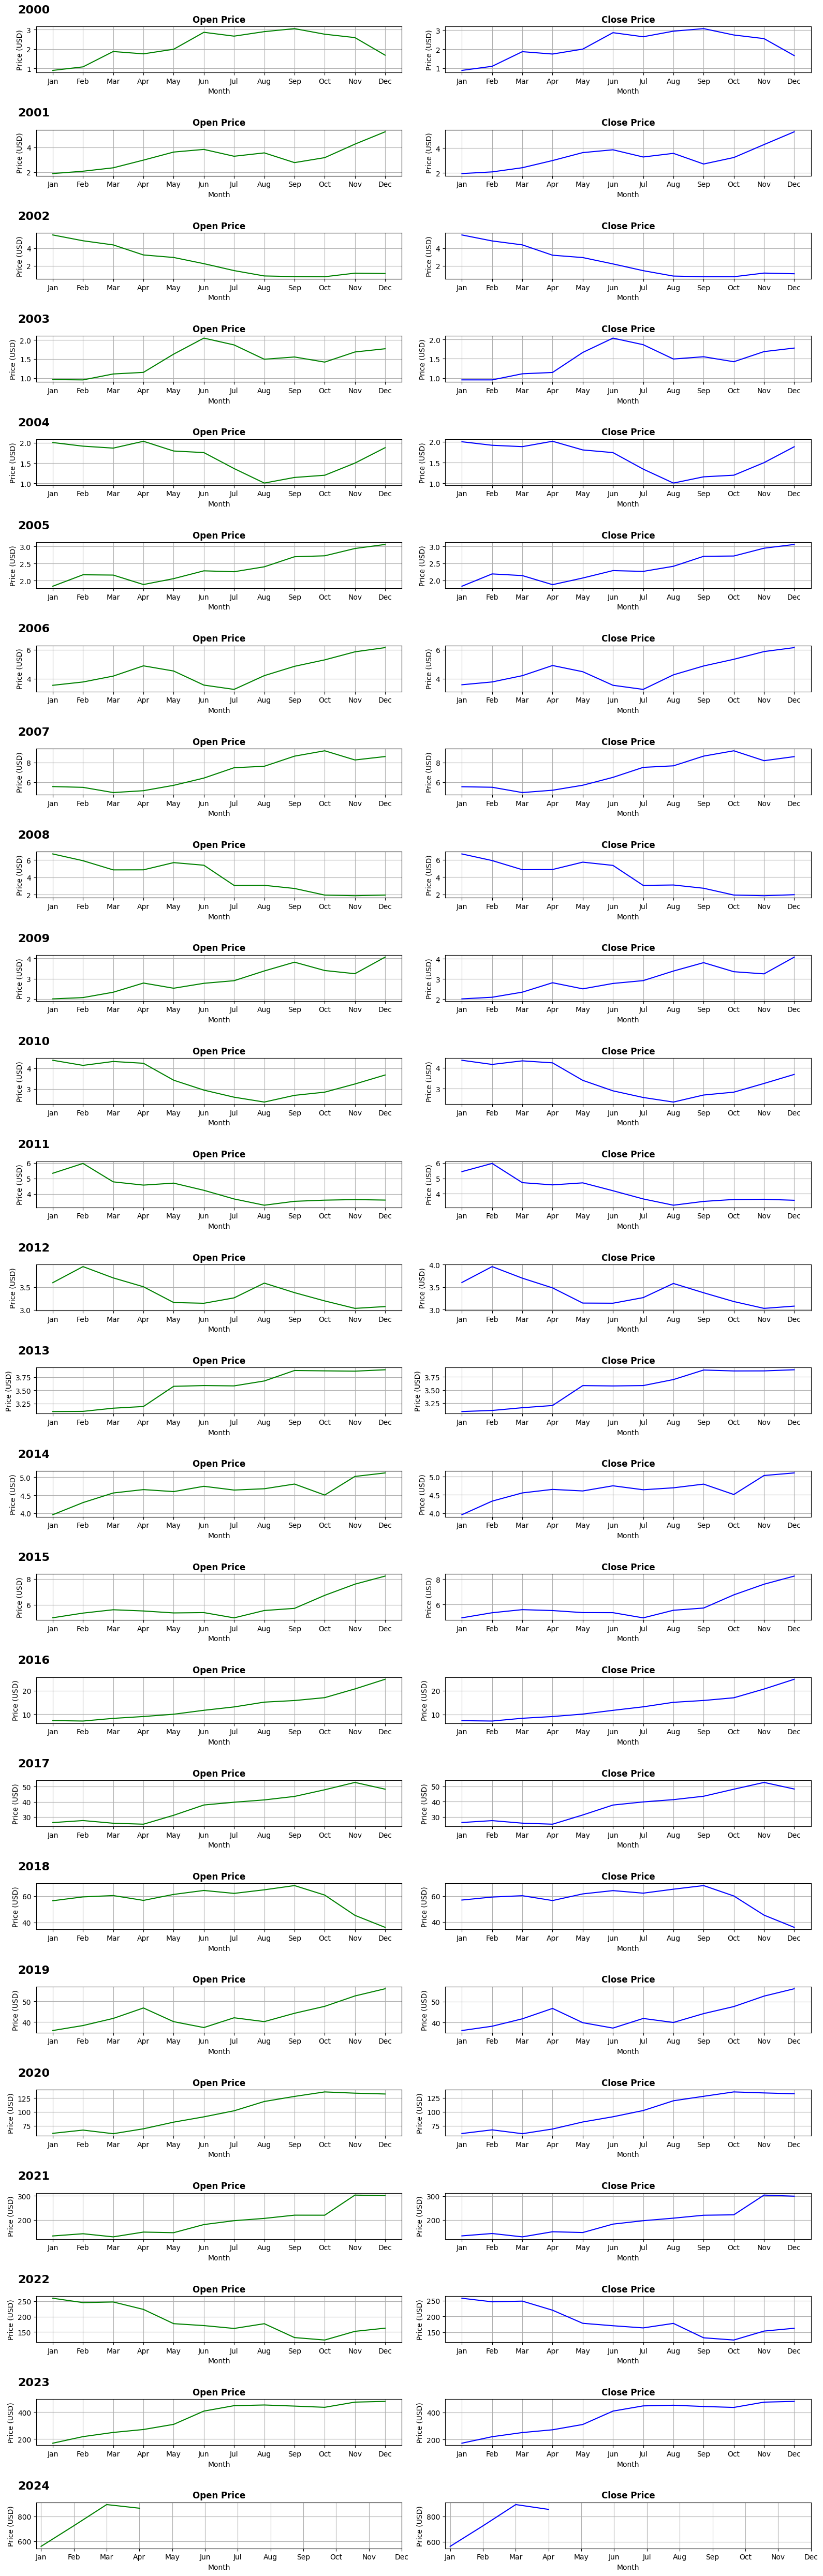

In [84]:
# ...existing code...
fig, axes = plt.subplots(25, 2, figsize=(16, 50))
years = sorted(df['Year'].unique())
for i, year in enumerate(years):
    monthly_data = df[df['Year'] == year].groupby('Month').mean()
    # Add year as a bold label above both subplots in the row
    axes[i, 0].text(-0.05, 1.25, f"{year}", transform=axes[i, 0].transAxes,
                    fontsize=16, fontweight='bold', ha='left', va='bottom')
    # Open Price
    axes[i, 0].plot(monthly_data.index, monthly_data['Open'], color='green', )
    axes[i, 0].set_title('Open Price', fontweight='bold')
    axes[i, 0].set_xlabel('Month')
    axes[i, 0].set_xticks(np.arange(1, 13, 1))
    axes[i, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i, 0].set_ylabel('Price (USD)')
    axes[i, 0].grid()
    # Close Price
    axes[i, 1].plot(monthly_data.index, monthly_data['Close'], color='blue')
    axes[i, 1].set_title('Close Price', fontweight='bold')
    axes[i, 1].set_xlabel('Month')
    axes[i, 1].set_xticks(np.arange(1, 13, 1))
    axes[i, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i, 1].set_ylabel('Price (USD)')
    axes[i, 1].grid()
plt.tight_layout()
plt.show()

In [85]:
# This visualization shows the average monthly stock prices of NVIDIA for each year, allowing us to observe trends and patterns over time. Each row represents a different year, with the left subplot showing the average open price and the right subplot showing the average close price for each month of that year.
# We can observe how the stock prices have changed over the years, with some years showing significant increases in both open and close prices, while others may show more stability or even declines.